<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Обучение-моделей-без-учёта-дисбаланса" data-toc-modified-id="Обучение-моделей-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей без учёта дисбаланса</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Выбор-метода-борьбы-с-дисбалансом" data-toc-modified-id="Выбор-метода-борьбы-с-дисбалансом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбор метода борьбы с дисбалансом</a></span></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск лучшей модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

В «Бета-Банке» наблюдается ежемесячный отток клиентов клиенты. Маркетологи считают, что сохранять текущих клиентов дешевле, чем привлекать новых. 

Цель — спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

Задача исследования — построить модель прогноза оттока с предельно большим значением F1-меры (не менее 0.59) и оценить метрику AUC-ROC.

Доступны исторические данные о поведении клиентов и расторжении договоров с банком.    

*Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)*

**Исследование пройдёт в пять этапов:**
 1. Изучение и подготовка данных;
 2. Исследование задачи;
 3. Борьба с дисбалансом;
 4. Тестирование модели;
 5. Общий вывод.

## Изучение и подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyClassifier

In [2]:
# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Данные для исследования получаем из файла `Churn.csv`:

In [3]:
# чтение файлов с данными и сохранение в df
try:
    df = pd.read_csv('datasets/Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

In [4]:
# получение первых пяти строк таблицы
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Описание данных**

*Признаки:*
*	`RowNumber` — индекс строки в данных;
*	`CustomerId` — уникальный идентификатор клиента;
*	`Surname` — фамилия;
*	`CreditScore` — кредитный рейтинг;
*	`Geography` — страна проживания;

*	`Gender` — пол;
*	`Age` — возраст;
*	`Tenure` — сколько лет человек является клиентом банка;
*	`Balance` — баланс на счёте;
*	`NumOfProducts` — количество продуктов банка, используемых клиентом;
*	`HasCrCard` — наличие кредитной карты;
*	`IsActiveMember` — активность клиента;
*	`EstimatedSalary` — предполагаемая зарплата;

*Целевой признак:*
*	`Exited` — факт ухода клиента.

**Обработка названий столбцов**

Приведем названия столбцов к нижнему регистру, а также "змеиному" стилю:

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
df.columns = ['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited']
df.columns

Index(['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited'],
      dtype='object')

**Обработка пропусков**

In [7]:
# подсчёт доли пропусков 
df.isna().mean()

row_number          0.0000
customer_id         0.0000
surname             0.0000
creditscore         0.0000
geography           0.0000
gender              0.0000
age                 0.0000
tenure              0.0909
balance             0.0000
num_of_products     0.0000
has_crcard          0.0000
isactive_member     0.0000
estimated_salary    0.0000
exited              0.0000
dtype: float64

В столбце tenure содержатся пропуски.

In [8]:
# подсчет доли пропущенных значений
print("Доля пропущеннных значений {:.1%}".format(df['tenure'].isna().sum()/len(df)))

Доля пропущеннных значений 9.1%


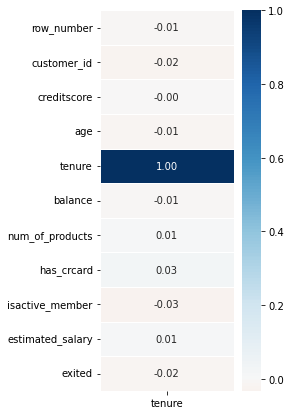

In [9]:
# матрица корреляции
plt.figure(figsize=(3,7))
sns.heatmap(df.corr()[['tenure']], center=0, linewidths=.5, annot=True, cmap="RdBu", fmt='.2f');

Корреляции данных в столбце tenure с остальными колонками не наблюдается.     
Заполним пропуски медианным значением:

In [10]:
# заполнение пропусков в столбце медианным значением
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [11]:
# подсчет доли пропущенных значений
print("Доля пропущеннных значений {:.1%}".format(df['tenure'].isna().sum()/len(df)))

Доля пропущеннных значений 0.0%


**Приведение данных к корректному типу**

In [12]:
# получение информации о типах данных
df.dtypes

row_number            int64
customer_id           int64
surname              object
creditscore           int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_crcard            int64
isactive_member       int64
estimated_salary    float64
exited                int64
dtype: object

Для экономии места изменим тип данных на целочисленный 32-х битный и вещественный 32-х битный, а также скорректируем тип в столбце tenure на целочисленный:

In [13]:
# изменение типа данных на int32
df['row_number'] = df['row_number'].astype('int')
df['customer_id'] = df['customer_id'].astype('int')
df['creditscore'] = df['creditscore'].astype('int')
df['age'] = df['age'].astype('int')
df['num_of_products'] = df['num_of_products'].astype('int')
df['has_crcard'] = df['has_crcard'].astype('int')
df['isactive_member'] = df['isactive_member'].astype('int')
df['exited'] = df['exited'].astype('int')
df['tenure'] = df['tenure'].astype('int')

# изменение типа данных на float32
df['balance'] = df['balance'].astype('float32')
df['estimated_salary'] = df['estimated_salary'].astype('float32')

In [14]:
# получение информации о типах данных
df.dtypes

row_number            int32
customer_id           int32
surname              object
creditscore           int32
geography            object
gender               object
age                   int32
tenure                int32
balance             float32
num_of_products       int32
has_crcard            int32
isactive_member       int32
estimated_salary    float32
exited                int32
dtype: object

**Поиск и обработка дубликатов**

In [15]:
# подсчет явных дубликатов
df.duplicated().sum()

0

Дубликаты в данных не обнаружены

**Поиск аномалий в данных**

In [16]:
# числовое описание данных таблицы
df.describe()

,row_number,customer_id,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.781250,1.530200,0.70550,0.515100,100090.125000,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62398.953125,0.581654,0.45584,0.499797,57510.468750,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.109375,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.539062,1.000000,1.00000,1.000000,100193.914062,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.238281,2.000000,1.00000,1.000000,149388.253906,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.093750,4.000000,1.00000,1.000000,199992.484375,1.000000


Явных аномалий в данных не наблюдается

### Выводы

💡 В исходном файле содержатся данные о поведении клиентов и расторжении договоров с банком «Бета-Банк». В ходе первичного анализа данных было выявлено:     

* В названии колонок обнаружено нарушение стиля — названия были приведены к нижнему регистру и "змеиному" стилю;    

* Количество значений в столбцах различалось. Пропуски в столбце tenure были обработаны путем заполнения медианным значением;         

* Данные были приведены к соответствующему вещественному и целочисленному типу; 

* Дубликаты и аномалии в данных не обнаружены.

## Исследование задачи

### Подготовка признаков

**Удаление лишних столбцов из датафрейма**

Удалим столбцы row_number, customer_id, surname не представляющие ценности для обучения моделей:

In [17]:
data = df.drop(['row_number', 'customer_id', 'surname'], axis=1).copy()
data.head()

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,619,France,Female,42,2,0.000000,1,1,1,101348.882812,1
1,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0
2,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.632812,0
4,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562,0


**Проверка данных на дисбаланс классов**

Оценим баланс классов целевого признака в столбце exited:

In [18]:
# подсчет количества значений целевого признака
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [19]:
# подсчет доли положительных/отрицательных значений
print('Доля положительные значений: {:.2%}'.format(data['exited'].mean()))
print('Доля отрицательных значений: {:.2%}'.format(1-data['exited'].mean()))

Доля положительные значений: 20.37%
Доля отрицательных значений: 79.63%


Присутствует явное смещение в сторону отрицательных значений.

**Прямое кодирование категориальных признаков**

In [20]:
# получение первых пяти строк таблицы
data.head()

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,619,France,Female,42,2,0.000000,1,1,1,101348.882812,1
1,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0
2,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.632812,0
4,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562,0


Преобразуем категориальные данные в количественные в столбцах geography и gender с помощью метода прямого кодирования — OHE (One-Hot Encoding):

In [21]:
# прямое кодирование признаков
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.000000,1,1,1,101348.882812,1,0,0,0
1,608,41,1,83807.859375,1,0,1,112542.578125,0,0,1,0
2,502,42,8,159660.796875,3,1,0,113931.570312,1,0,0,0
3,699,39,1,0.000000,2,0,0,93826.632812,0,0,0,0
4,850,43,2,125510.820312,1,1,1,79084.101562,0,0,1,0


**Разделение данных на выборки**

Разделим данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки:

In [22]:
# разделение данных на обучающую, валидационную и тестовую выборки
df_train, df_test = train_test_split(data_ohe, train_size=0.6, test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df_test, test_size=0.5, random_state=12345)

In [23]:
print("Процент данных в обучающей выборке:", '{:.0%}'.format(len(df_train)/len(data_ohe)))
print("Процент данных в валидационной выборке", '{:.0%}'.format(len(df_valid)/len(data_ohe)))
print("Процент данных в тестовой выборке", '{:.0%}'.format(len(df_test)/len(data_ohe)))

Процент данных в обучающей выборке: 60%
Процент данных в валидационной выборке 20%
Процент данных в тестовой выборке 20%


In [24]:
# определение функции для создания переменных для признаков и целевого признака
def splitting_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [25]:
# cоздание переменных для признаков и целевого признака
features_train, target_train = splitting_data(df_train, 'exited')
features_valid, target_valid = splitting_data(df_valid, 'exited')
features_test, target_test = splitting_data(df_test, 'exited')

In [26]:
# проверка суммы значений
print("Сумма значений новых выборок:", len(features_train) + len(features_valid) + len(features_test))
print("Количество значений исходной выборки:", len(data_ohe))

Сумма значений новых выборок: 10000
Количество значений исходной выборки: 10000


**Стандартизация данных**

Приведем данных к единому масштабу с помощью инструмента стандартизации. Масштабируемые данные находятся в столбцах: creditscore, age, balance, estimated_salary.

In [27]:
# стандартизация данных в выборках
numeric = ['creditscore', 'age', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

### Обучение моделей без учёта дисбаланса

**Модель дерева решений**

In [28]:
# гиперпараметры
parameters = {'max_depth': list(range(1, 11))
             }

# обучение модели
model = DecisionTreeClassifier(random_state=12345)
search_random = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1')

search_random.fit(features_train, target_train)    
predictions = search_random.best_estimator_.predict(features_valid)
     
probabilities_valid = search_random.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
print("Параметры лучшей модели:", search_random.best_params_)
print() 

accuracy = accuracy_score(predictions, target_valid)
precision = precision_score(predictions, target_valid)
recall = recall_score(predictions, target_valid)
f1 = f1_score(target_valid, predictions)
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

tree_results = [accuracy, precision, recall, f1, roc_auc]

Параметры лучшей модели: {'max_depth': 7}

Accuracy: 0.8375
Precision: 0.3806146572104019
Recall: 0.71875
F1: 0.4976816074188563
AUC-ROC: 0.8276907555567548


**Модель случайного леса**

In [29]:
# гиперпараметры
parameters = {'max_depth': list(range(1, 11)),
              'n_estimators': list(range(5, 51, 5)),
              'min_samples_leaf': list(range(1, 6))
             }

# обучение модели
model = RandomForestClassifier(random_state=12345)
search_random = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1')

search_random.fit(features_train, target_train)    
predictions = search_random.best_estimator_.predict(features_valid)
     
probabilities_valid = search_random.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
print("Параметры лучшей модели:", search_random.best_params_)
print() 

accuracy = accuracy_score(predictions, target_valid)
precision = precision_score(predictions, target_valid)
recall = recall_score(predictions, target_valid)
f1 = f1_score(target_valid, predictions)
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

rf_results = [accuracy, precision, recall, f1, roc_auc]

Параметры лучшей модели: {'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 10}

Accuracy: 0.849
Precision: 0.41843971631205673
Recall: 0.759656652360515
F1: 0.5396341463414634
AUC-ROC: 0.8428727976482264


**Модель логистической регрессии**

In [30]:
# гиперпараметры
parameters = {'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
              'penalty': ['l2', 'none']
             }

# обучение модели
model = LogisticRegression(random_state=12345)
search_random = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1')

search_random.fit(features_train, target_train)    
predictions = search_random.best_estimator_.predict(features_valid)
     
probabilities_valid = search_random.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
print("Параметры лучшей модели:", search_random.best_params_)
print() 

accuracy = accuracy_score(predictions, target_valid)
precision = precision_score(predictions, target_valid)
recall = recall_score(predictions, target_valid)
f1 = f1_score(target_valid, predictions)
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

logistic_results = [accuracy, precision, recall, f1, roc_auc]

Параметры лучшей модели: {'penalty': 'none', 'solver': 'lbfgs'}

Accuracy: 0.7915
Precision: 0.1867612293144208
Recall: 0.5197368421052632
F1: 0.27478260869565213
AUC-ROC: 0.7385750542296098


### Выводы

In [31]:
# итоги обучения моделей
results_unbalanced_data = pd.DataFrame({'Tree': tree_results, 'RF': rf_results, 'Logistic': logistic_results},
                                       index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC'])
results_unbalanced_data

,Tree,RF,Logistic
Accuracy,0.837500,0.849000,0.791500
Precision,0.380615,0.418440,0.186761
Recall,0.718750,0.759657,0.519737
F1,0.497682,0.539634,0.274783
AUC-ROC,0.827691,0.842873,0.738575


 💡 Для улучшения результатов прогнозирования и обучения моделей были выполнены следующие преобразования с данными:
* удалены ненужные признаки (индекс строки в данных, уникальный идентификатор клиента, фамилия клиента); 
* проведена оценка баланса классов целевого признака — выявлено явное смещение в сторону отрицательных значений;
* категориальные данные в столбцах geography и gender были преобразованы в количественные с помощью метода прямого кодирования (OHE);
* данные были разделены на обучающую (60%), валидационную (20%) и тестовую (20%) выборки;
* выполнена стандартизация количественных переменных.    

Без учета дисбаланса классов наилучший результат по метрике F1 показала модель случайного леса с параметрами: количество деревьев — 10 шт., глубина — 9 условий, минимальное количество объектов в узле — 2 шт.    
F1-мера составила 0.53, а AUC-ROC — 0.84, что сигнализирует о невысоком качестве модели из-за присутствия дисбаланса классов.

## Борьба с дисбалансом

### Выбор метода борьбы с дисбалансом

Протестируем несколько методов борьбы с дисбалансом на моделях с наилучшими параметрами и выберем целевой метод. В качестве определяющей метрики будем использовать F1-меру.

**Взвешивание классов (balancing)**

In [32]:
# модель дерева решений
model = DecisionTreeClassifier(max_depth=7, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)    
predictions = model.predict(features_valid)     

f1 = f1_score(target_valid, predictions)
tree_results = f1

# модель случайного леса
model = RandomForestClassifier(max_depth=9, n_estimators=10, min_samples_leaf=2, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)    
predictions = model.predict(features_valid)    

f1 = f1_score(target_valid, predictions)
rf_results = f1

# модель логистической регрессии
model = LogisticRegression(solver='lbfgs', penalty='none', random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)    
predictions = model.predict(features_valid)   

f1 = f1_score(target_valid, predictions)
logistic_results = f1

# итоги обучения моделей
results_balanced_data = pd.DataFrame({'Tree': tree_results, 'RF': rf_results, 'Logistic': logistic_results},
                                       index=['F1'])
display(results_balanced_data)

,Tree,RF,Logistic
F1,0.559387,0.581066,0.477509


**Увеличение выборки (Upsampling)**

Воспользуемся функцией, которая выполняет следующие преобразования:

* разделим обучающую выборку на отрицательные и положительные объекты;
* скопируем несколько раз положительные объекты;
* с учетом полученных данных создадим новую обучающую выборку;
* перемешаем данные.

In [33]:
# определение upsampling-функции
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [34]:
# получение увеличенных выборок
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


In [35]:
# подсчет доли положительных/отрицательных значений
print('Доля положительные значений: {:.2%}'.format(target_upsampled.mean()))
print('Доля отрицательных значений: {:.2%}'.format(1-target_upsampled.mean()))

Доля положительные значений: 49.90%
Доля отрицательных значений: 50.10%


Обучим модели на новых данных и посмотрим результаты:

In [36]:
# модель дерева решений
model = DecisionTreeClassifier(max_depth=7, random_state=12345)
model.fit(features_upsampled, target_upsampled)    
predictions = model.predict(features_valid)     

f1 = f1_score(target_valid, predictions)
tree_results = f1

# модель случайного леса
model = RandomForestClassifier(max_depth=9, n_estimators=10, min_samples_leaf=2, random_state=12345)
model.fit(features_upsampled, target_upsampled)    
predictions = model.predict(features_valid)    

f1 = f1_score(target_valid, predictions)
rf_results = f1

# модель логистической регрессии
model = LogisticRegression(solver='lbfgs', penalty='none', random_state=12345)
model.fit(features_upsampled, target_upsampled)    
predictions = model.predict(features_valid)   

f1 = f1_score(target_valid, predictions)
logistic_results = f1

# итоги обучения моделей
results_upsampled_data = pd.DataFrame({'Tree': tree_results, 'RF': rf_results, 'Logistic': logistic_results},
                                       index=['F1'])
display(results_upsampled_data)

,Tree,RF,Logistic
F1,0.560461,0.596741,0.47619


**Уменьшение выборки (Downsampling)**

Воспользуемся функцией, которая выполняет следующие преобразования:

* разделим обучающую выборку на отрицательные и положительные объекты;
* случайным образом отбросим часть из отрицательных объектов;
* с учетом полученных данных создадим новую обучающую выборку;
* перемешаем данные.

In [37]:
# определение downsampling-функции
def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=fraction, random_state=12345)
    target_sample = target_zeros.sample(frac=fraction, random_state=12345)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled, target_downsampled  = shuffle(features_downsampled, target_downsampled, random_state=12345)
       
    return features_downsampled, target_downsampled

In [38]:
# получение уменьшенных выборок
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


In [39]:
# подсчет доли положительных/отрицательных значений
print('Доля положительные значений: {:.2%}'.format(target_downsampled.mean()))
print('Доля отрицательных значений: {:.2%}'.format(1-target_downsampled.mean()))

Доля положительные значений: 49.90%
Доля отрицательных значений: 50.10%


Обучим модели на новых данных и посмотрим результаты:

In [40]:
# модель дерева решений
model = DecisionTreeClassifier(max_depth=7, random_state=12345)
model.fit(features_downsampled, target_downsampled)    
predictions = model.predict(features_valid)     

f1 = f1_score(target_valid, predictions)
tree_results = f1

# модель случайного леса
model = RandomForestClassifier(max_depth=9, n_estimators=10, min_samples_leaf=2, random_state=12345)
model.fit(features_downsampled, target_downsampled)    
predictions = model.predict(features_valid)    

f1 = f1_score(target_valid, predictions)
rf_results = f1

# модель логистической регрессии
model = LogisticRegression(solver='lbfgs', penalty='none', random_state=12345)
model.fit(features_downsampled, target_downsampled)    
predictions = model.predict(features_valid)   

f1 = f1_score(target_valid, predictions)
logistic_results = f1

# итоги обучения моделей
results_downsampled_data = pd.DataFrame({'Tree': tree_results, 'RF': rf_results, 'Logistic': logistic_results},
                                       index=['F1'])
display(results_downsampled_data)

,Tree,RF,Logistic
F1,0.544028,0.572238,0.485885


**Изменение порога классификации (Threshold)**

Переведем близость к классам в вероятность классов — попытаемся оценить насколько вероятен тот или иной класс при различных значения порога (threshold), который по умолчанию равен 0.5.    

Threshold = 0.00 | Precision = 0.209, Recall = 0.969 | F1-score = 0.344
Threshold = 0.05 | Precision = 0.276, Recall = 0.939 | F1-score = 0.427
Threshold = 0.10 | Precision = 0.386, Recall = 0.849 | F1-score = 0.531
Threshold = 0.15 | Precision = 0.440, Recall = 0.818 | F1-score = 0.572
Threshold = 0.20 | Precision = 0.483, Recall = 0.754 | F1-score = 0.589
Threshold = 0.25 | Precision = 0.548, Recall = 0.645 | F1-score = 0.593
Threshold = 0.30 | Precision = 0.574, Recall = 0.553 | F1-score = 0.563
Threshold = 0.35 | Precision = 0.657, Recall = 0.466 | F1-score = 0.545
Threshold = 0.40 | Precision = 0.708, Recall = 0.423 | F1-score = 0.530
Threshold = 0.45 | Precision = 0.708, Recall = 0.423 | F1-score = 0.530
Threshold = 0.50 | Precision = 0.719, Recall = 0.381 | F1-score = 0.498
Threshold = 0.55 | Precision = 0.719, Recall = 0.381 | F1-score = 0.498
Threshold = 0.60 | Precision = 0.721, Recall = 0.378 | F1-score = 0.496
Threshold = 0.65 | Precision = 0.796, Recall = 0.296 | F1-score 

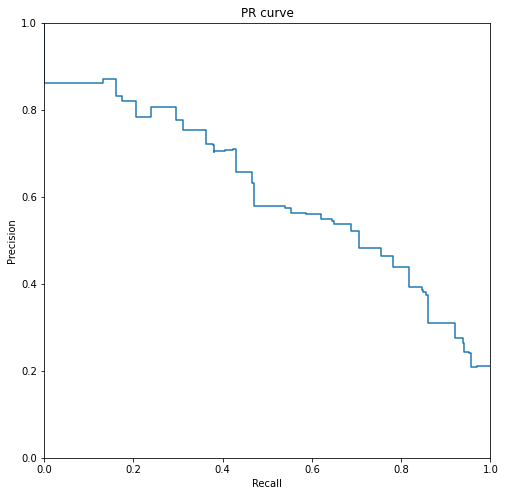

In [41]:
# модель дерева решений
tree_results = 0

model = DecisionTreeClassifier(max_depth=7, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.05):
    predictions = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))
    
    if f1 > tree_results:
        tree_results = f1

print()
print("Лучший показатель F1:", tree_results)
        
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(8, 8))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show()

Threshold = 0.00 | Precision = 0.211, Recall = 1.000 | F1-score = 0.349
Threshold = 0.05 | Precision = 0.272, Recall = 0.981 | F1-score = 0.426
Threshold = 0.10 | Precision = 0.346, Recall = 0.898 | F1-score = 0.500
Threshold = 0.15 | Precision = 0.413, Recall = 0.811 | F1-score = 0.547
Threshold = 0.20 | Precision = 0.476, Recall = 0.745 | F1-score = 0.581
Threshold = 0.25 | Precision = 0.521, Recall = 0.671 | F1-score = 0.587
Threshold = 0.30 | Precision = 0.586, Recall = 0.610 | F1-score = 0.598
Threshold = 0.35 | Precision = 0.618, Recall = 0.565 | F1-score = 0.590
Threshold = 0.40 | Precision = 0.674, Recall = 0.504 | F1-score = 0.576
Threshold = 0.45 | Precision = 0.705, Recall = 0.459 | F1-score = 0.556
Threshold = 0.50 | Precision = 0.760, Recall = 0.418 | F1-score = 0.540
Threshold = 0.55 | Precision = 0.765, Recall = 0.362 | F1-score = 0.491
Threshold = 0.60 | Precision = 0.805, Recall = 0.312 | F1-score = 0.450
Threshold = 0.65 | Precision = 0.830, Recall = 0.265 | F1-score 

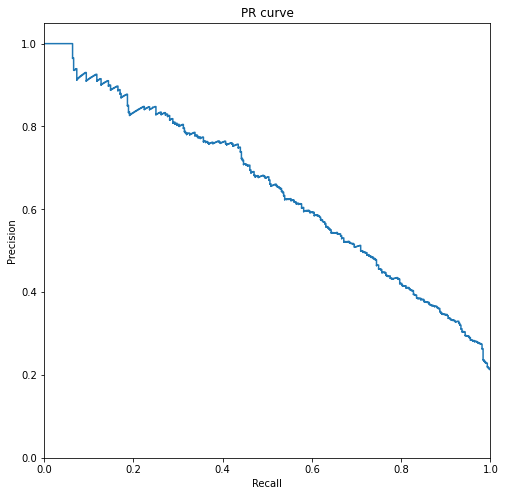

In [42]:
# модель случайного леса
rf_results = 0

model = RandomForestClassifier(max_depth=9, n_estimators=10, min_samples_leaf=2, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.05):
    predictions = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))
    
    if f1 > rf_results:
        rf_results = f1

print()
print("Лучший показатель F1:", rf_results)

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(8, 8))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show()

Threshold = 0.00 | Precision = 0.211, Recall = 1.000 | F1-score = 0.349
Threshold = 0.05 | Precision = 0.233, Recall = 0.955 | F1-score = 0.375
Threshold = 0.10 | Precision = 0.286, Recall = 0.882 | F1-score = 0.431
Threshold = 0.15 | Precision = 0.330, Recall = 0.775 | F1-score = 0.463
Threshold = 0.20 | Precision = 0.371, Recall = 0.660 | F1-score = 0.475
Threshold = 0.25 | Precision = 0.401, Recall = 0.558 | F1-score = 0.466
Threshold = 0.30 | Precision = 0.422, Recall = 0.461 | F1-score = 0.441
Threshold = 0.35 | Precision = 0.462, Recall = 0.388 | F1-score = 0.422
Threshold = 0.40 | Precision = 0.487, Recall = 0.319 | F1-score = 0.386
Threshold = 0.45 | Precision = 0.512, Recall = 0.248 | F1-score = 0.334
Threshold = 0.50 | Precision = 0.520, Recall = 0.187 | F1-score = 0.275
Threshold = 0.55 | Precision = 0.586, Recall = 0.161 | F1-score = 0.252
Threshold = 0.60 | Precision = 0.587, Recall = 0.104 | F1-score = 0.177
Threshold = 0.65 | Precision = 0.588, Recall = 0.071 | F1-score 

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


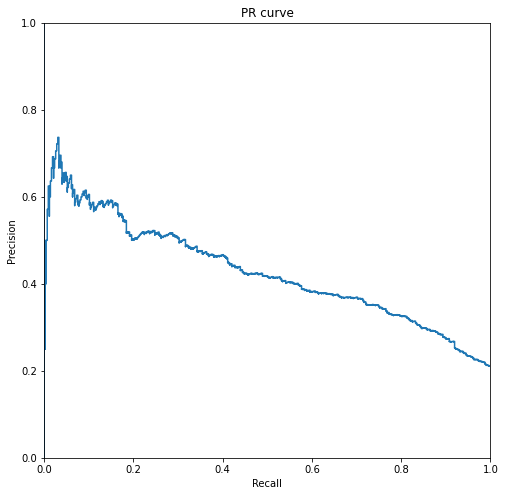

In [43]:
# модель логистической регрессии
logistic_results = 0

model = LogisticRegression(solver='lbfgs', penalty='none', random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.05):
    predictions = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))
    
    if f1 > logistic_results:
        logistic_results = f1

print()
print("Лучший показатель F1:", logistic_results)

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(8, 8))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show()

In [44]:
# итоги обучения моделей
results_threshold_data = pd.DataFrame({'Tree': tree_results, 'RF': rf_results, 'Logistic': logistic_results},
                                       index=['F1'])
display(results_threshold_data)

,Tree,RF,Logistic
F1,0.592834,0.597914,0.474894


Сведем все результаты теста методов борьбы с дисбалансом классов в одну таблицу:

In [45]:
balancing_results = pd.concat([results_unbalanced_data[3:4]] 
                              + [results_balanced_data] 
                              + [results_upsampled_data] 
                              + [results_downsampled_data] 
                              + [results_threshold_data])

balancing_results.index = pd.MultiIndex.from_product([['unbalanced', 'balanced', 'upsampling', 'downsampling', 'threshold'],
                                                        ['F1']])

balancing_results

,,Tree,RF,Logistic
unbalanced,F1,0.497682,0.539634,0.274783
balanced,F1,0.559387,0.581066,0.477509
upsampling,F1,0.560461,0.596741,0.476190
downsampling,F1,0.544028,0.572238,0.485885
threshold,F1,0.592834,0.597914,0.474894


💡 В качестве целевого метода борьбы с дисбалансом классов выбираем "увеличение выборки" (upsampling), который будем использовать для определения лучшей модели. 

### Поиск лучшей модели

Выбор лучшей модели произведем оценивая их качество по F1-мере и дополнительно измеряя AUC-ROC.

**Модель дерева решений**

Параметры лучшей модели: {'max_depth': 10}

Accuracy: 0.752
Precision: 0.6501182033096927
Recall: 0.44141252006420545
F1: 0.5258126195028681
AUC-ROC: 0.7495289107156509


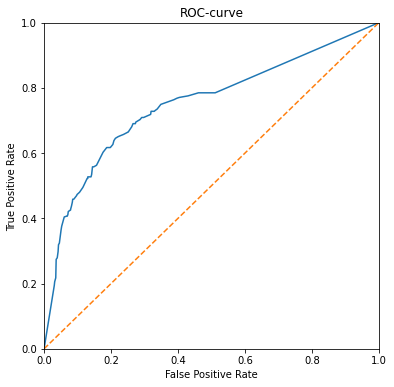

In [46]:
# гиперпараметры
parameters = {'max_depth': list(range(1, 11))
             }

# обучение модели
model = DecisionTreeClassifier(random_state=12345)
search_random = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1')

search_random.fit(features_upsampled, target_upsampled)    
predictions = search_random.best_estimator_.predict(features_valid)
     
probabilities_valid = search_random.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
print("Параметры лучшей модели:", search_random.best_params_)
print() 

accuracy = accuracy_score(predictions, target_valid)
precision = precision_score(predictions, target_valid)
recall = recall_score(predictions, target_valid)
f1 = f1_score(target_valid, predictions)
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

tree_results = [accuracy, precision, recall, f1, roc_auc]

# график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-') #ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

**Модель случайного леса**

Параметры лучшей модели: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 40}

Accuracy: 0.817
Precision: 0.6572104018912529
Recall: 0.5571142284569138
F1: 0.6030368763557483
AUC-ROC: 0.8526528660367488


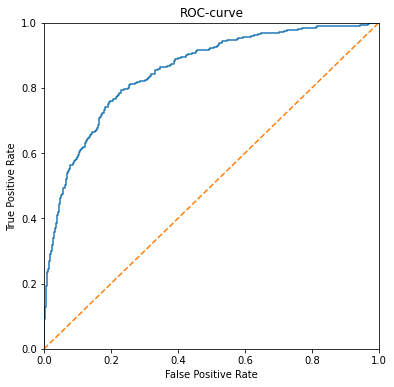

In [47]:
# гиперпараметры
parameters = {'max_depth': list(range(1, 11)),
              'n_estimators': list(range(5, 51, 5)),
              'min_samples_leaf': list(range(1, 6))
             }

# обучение модели
model = RandomForestClassifier(random_state=12345)
search_random = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1')

search_random.fit(features_upsampled, target_upsampled)    
predictions = search_random.best_estimator_.predict(features_valid)
     
probabilities_valid = search_random.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
print("Параметры лучшей модели:", search_random.best_params_)
print() 

accuracy = accuracy_score(predictions, target_valid)
precision = precision_score(predictions, target_valid)
recall = recall_score(predictions, target_valid)
f1 = f1_score(target_valid, predictions)
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

rf_results = [accuracy, precision, recall, f1, roc_auc]

# график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-') #ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

**Модель логистической регрессии**

Параметры лучшей модели: {'penalty': 'none', 'solver': 'lbfgs'}

Accuracy: 0.6975
Precision: 0.6501182033096927
Recall: 0.3756830601092896
F1: 0.47619047619047616
AUC-ROC: 0.7416751740069647


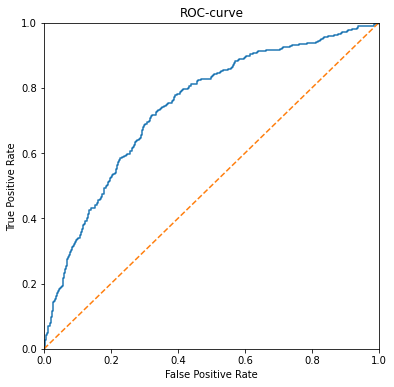

In [48]:
# гиперпараметры
parameters = {'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
              'penalty': ['l2', 'none']
             }

# обучение модели
model = LogisticRegression(random_state=12345)
search_random = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1')

search_random.fit(features_upsampled, target_upsampled)    
predictions = search_random.best_estimator_.predict(features_valid)
     
probabilities_valid = search_random.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
print("Параметры лучшей модели:", search_random.best_params_)
print() 

accuracy = accuracy_score(predictions, target_valid)
precision = precision_score(predictions, target_valid)
recall = recall_score(predictions, target_valid)
f1 = f1_score(target_valid, predictions)
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

logistic_results = [accuracy, precision, recall, f1, roc_auc]

# график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-') #ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

### Выводы

In [49]:
# итоги обучения моделей
results_upsampling_data = pd.DataFrame({'Tree': tree_results, 'RF': rf_results, 'Logistic': logistic_results},
                                       index=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC'])
results_upsampling_data

,Tree,RF,Logistic
Accuracy,0.752000,0.817000,0.697500
Precision,0.650118,0.657210,0.650118
Recall,0.441413,0.557114,0.375683
F1,0.525813,0.603037,0.476190
AUC-ROC,0.749529,0.852653,0.741675


💡 На моделях с наилучшими параметрами (определенными в разделе 2.2) были протестированы различные методы борьбы с дисбалансом классов и выбран целевой метод — увеличение выборки (upsampling).

Далее, модели были обучены на увеличенной выборке, оценено их качество с помощью F1-меры и измерен AUC-ROC.  
Наилучший результат показала модель случайного леса с параметрами: количество деревьев — 40 шт., глубина — 10 условий, минимальное количество объектов в узле — 1 шт.    

F1-мера лучшей модели составила 0.60,  AUC-ROC — 0.85.

## Тестирование модели

Обучим модели на суммарной выборке (обучающая + валидационная) и проверим на тестовой выборке:

In [50]:
# получение увеличенных выборок
features_upsampled, target_upsampled = upsample(pd.concat([features_train, features_valid], axis=0, join='outer'),
                                                pd.concat([target_train, target_valid], axis=0, join='outer'),
                                                4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(12857, 11)
(12857,)


In [51]:
# подсчет доли положительных/отрицательных значений
print('Доля положительные значений: {:.2%}'.format(target_upsampled.mean()))
print('Доля отрицательных значений: {:.2%}'.format(1-target_upsampled.mean()))

Доля положительные значений: 50.37%
Доля отрицательных значений: 49.63%


Accuracy: 0.825
Precision: 0.7009569377990431
Recall: 0.5656370656370656
F1: 0.6260683760683761
AUC-ROC: 0.7635661962629824


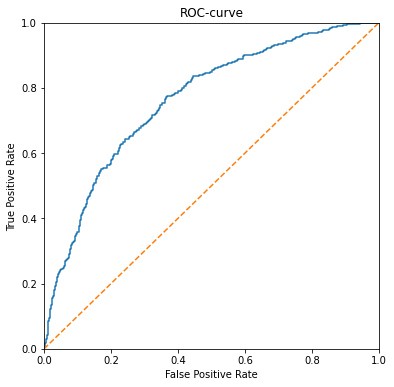

In [52]:
# модель случайного леса
model = RandomForestClassifier(max_depth=10, n_estimators=40, min_samples_leaf=1, random_state=12345)
model.fit(features_upsampled, target_upsampled)    
predictions = model.predict(features_test)    

probabilities_valid = search_random.best_estimator_.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

# вывод результатов
accuracy = accuracy_score(predictions, target_test)
precision = precision_score(predictions, target_test)
recall = recall_score(predictions, target_test)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, probabilities_one_valid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)   
print("F1:", f1)
print("AUC-ROC:", roc_auc)

# график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-') #ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

Согласно графику ROC-кривой точность модели "Случайный лес" (Random Forest) с заданными параметрами выше, чем у случайной модели.     
F1-мера составила 0.62, что выше целевого значения (0.59) и отвечает поставленной задаче.

## Общий вывод

* На этапе предобработки данных были исправлены нарушения стиля, заполнены пропуски, также данные были приведены к корректному типу;
* В ходе подготовки признаков были удалены ненужные признаки, выявлен дисбаланс классов со смещением в сторону отрицательных значений, выполнено преобразование категориальных данных в количественные с помощью метода прямого кодирования (OHE), данные разделены на обучающую, валидационную и тестовые выборки, также выполнена стандартизация данных;
* Методом обработки дисбаланса классов был выбран метод увеличения выборки (upsampling), что улучшило целевые метрики;
* Далее, были обучены и протестированы различные модели для прогнозирования оттока клиентов из «Бета-Банка». Наилучшие результаты показала модель "Случайный лес" (Random Forest) с параметрами: количество деревьев — 40 шт., глубина — 10 условий, минимальное количество объектов в узле  1 шт., обученная на сбалансированной выборке;
* В качестве показателя качества итоговой модели использовалась F1-мера, дополнительно оценивалась метрика AUC-ROC, которые составили соответственно 0.62 и 0.76 на тестовой выборке.

**Таким образом проверка обученной модели оттока на тестовой выборке подтвердила, что выбранный метод борьбы с дисбалансом классов помог нараститить целевую метрику качества F1 выше заданного в условии уровня.**
